In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [3]:
# let's open csv
data_raw = pd.read_csv('cinema1.csv')
data_raw.head()
print(data_raw.shape[0])

5050


In [4]:
data_sp = data_raw.copy()
data_sp = data_sp.drop(data_sp[(data_sp.isnull().sum(axis = 1)/data_sp.shape[1])*100 > 15].index)
del data_sp ['Unnamed: 28']
del data_sp['Unnamed: 0']

data_sp = data_sp.fillna(data_sp.mean())
print(data_sp.shape[0])

4853


In [5]:
data_sp = data_sp.drop(data_sp[data_sp['movie_facebook_likes'] > (data_sp['movie_facebook_likes'].mean() +  3 * data_sp['movie_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['movie_facebook_likes'] < (data_sp['movie_facebook_likes'].mean() -  3 * data_sp['movie_facebook_likes'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['gross'] > (data_sp['gross'].mean() +  3 * data_sp['gross'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['gross'] < (data_sp['gross'].mean() -  3 * data_sp['gross'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['actor_1_facebook_likes'] > (data_sp['actor_1_facebook_likes'].mean() +  3 * data_sp['actor_1_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['actor_1_facebook_likes'] < (data_sp['actor_1_facebook_likes'].mean() -  3 * data_sp['actor_1_facebook_likes'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['aspect_ratio'] > (data_sp['aspect_ratio'].mean() +  3 * data_sp['aspect_ratio'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['aspect_ratio'] < (data_sp['aspect_ratio'].mean() -  3 * data_sp['aspect_ratio'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['budget'] > (data_sp['budget'].mean() +  3 * data_sp['budget'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['budget'] < (data_sp['budget'].mean() -  3 * data_sp['budget'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['duration'] > (data_sp['duration'].mean() +  3 * data_sp['duration'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['duration'] < (data_sp['duration'].mean() -  3 * data_sp['duration'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['title_year'] > (data_sp['title_year'].mean() +  3 * data_sp['title_year'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['title_year'] < (data_sp['title_year'].mean() -  3 * data_sp['title_year'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['imdb_score'] > (data_sp['imdb_score'].mean() +  3 * data_sp['imdb_score'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['imdb_score'] < (data_sp['imdb_score'].mean() -  3 * data_sp['imdb_score'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['num_critic_for_reviews'] > (data_sp['num_critic_for_reviews'].mean() +  3 * data_sp['num_critic_for_reviews'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['num_critic_for_reviews'] < (data_sp['num_critic_for_reviews'].mean() -  3 * data_sp['num_critic_for_reviews'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['cast_total_facebook_likes'] > (data_sp['cast_total_facebook_likes'].mean() +  3 * data_sp['cast_total_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['cast_total_facebook_likes'] < (data_sp['cast_total_facebook_likes'].mean() -  3 * data_sp['cast_total_facebook_likes'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['director_facebook_likes'] > (data_sp['director_facebook_likes'].mean() +  3 * data_sp['director_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['director_facebook_likes'] < (data_sp['director_facebook_likes'].mean() -  3 * data_sp['director_facebook_likes'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['actor_2_facebook_likes'] > (data_sp['actor_2_facebook_likes'].mean() +  3 * data_sp['actor_2_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['actor_2_facebook_likes'] < (data_sp['actor_2_facebook_likes'].mean() -  3 * data_sp['actor_2_facebook_likes'].std()) ].index)

data_sp = data_sp.drop(data_sp[data_sp['actor_3_facebook_likes'] > (data_sp['actor_3_facebook_likes'].mean() +  3 * data_sp['actor_3_facebook_likes'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['actor_3_facebook_likes'] < (data_sp['actor_3_facebook_likes'].mean() -  3 * data_sp['actor_3_facebook_likes'].std()) ].index)

data_sp['num_voted_users'] = data_sp['num_voted_users'].astype(float)
data_sp = data_sp.drop(data_sp[data_sp['num_voted_users'] > (data_sp['num_voted_users'].mean() +  3 * data_sp['num_voted_users'].std()) ].index)
data_sp = data_sp.drop(data_sp[data_sp['num_voted_users'] < (data_sp['num_voted_users'].mean() -  3 * data_sp['num_voted_users'].std()) ].index)
print(data_sp.shape[0])

3842


In [6]:
res = data_raw[~data_raw.index.isin(data_sp.index)]

In [7]:
res.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,8,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,1,0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,3,0
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,9,0


In [8]:
res.shape[0]

1208

In [9]:
res.shape[0]/data_raw.shape[0]

0.2392079207920792

In [10]:
bad = res.movie_title

In [11]:
bad.drop_duplicates()

0                                           Avatar 
1         Pirates of the Caribbean: At World's End 
2                                          Spectre 
3                            The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens 
                           ...                     
5038                                      Sanctuary
5039                                          Bang 
5045                       Signed Sealed Delivered 
5046                                 The Following 
5047                          A Plague So Pleasant 
Name: movie_title, Length: 1173, dtype: object

In [12]:
bad.shape[0]

1208

In [13]:
a = data_raw.copy()
a = (a.set_index(a.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'}))
a.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title,level_31,genres
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0,0,Action
1,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0,1,Adventure
2,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0,2,Fantasy
3,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0,3,Sci-Fi
4,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,8,0,0,Action


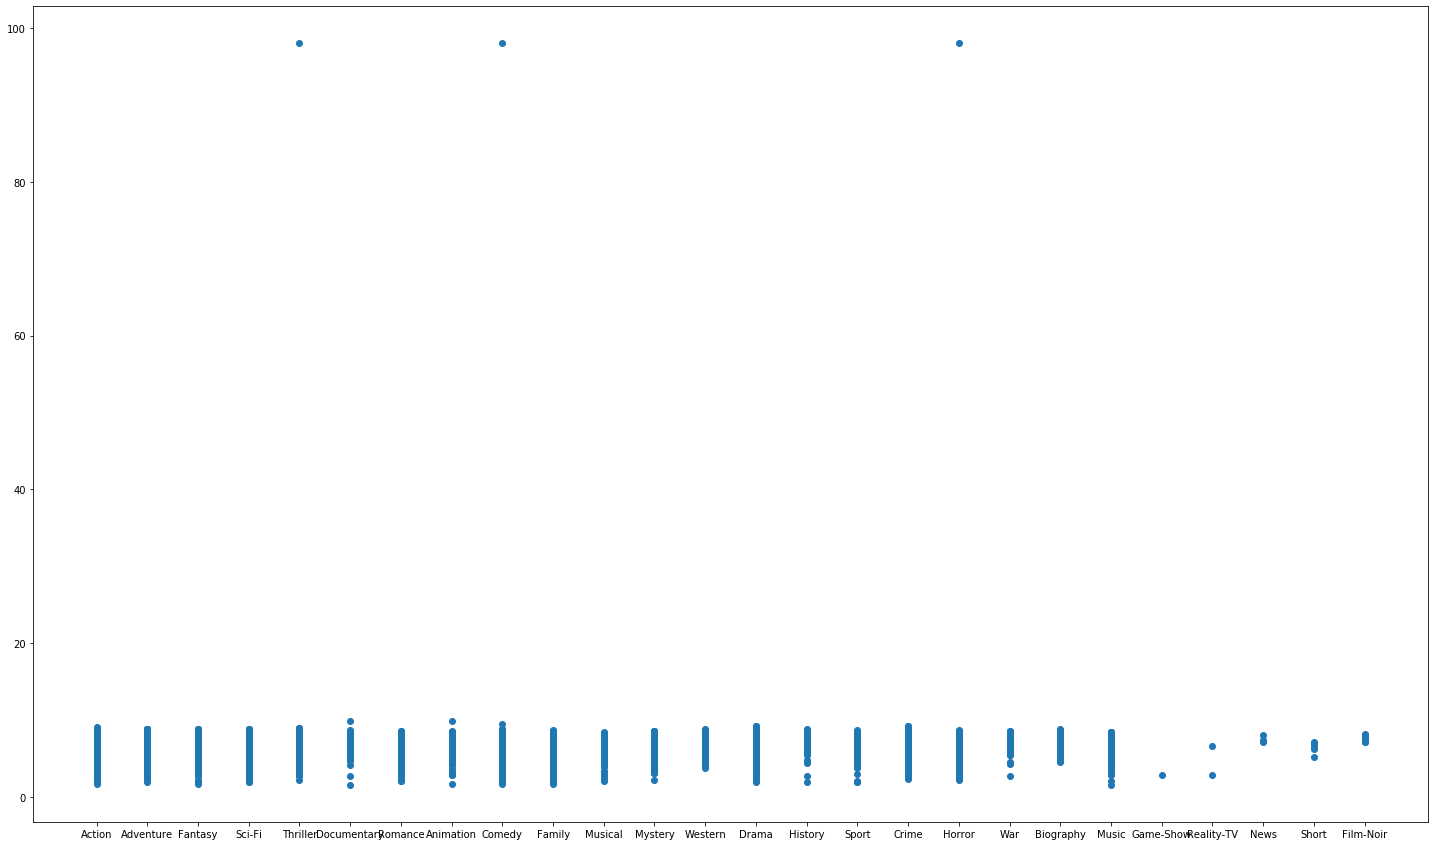

In [14]:
# 'genres' & 'imdb_score'
plt.figure(figsize=(25, 15))
plt.scatter(a['genres'],a['imdb_score'])

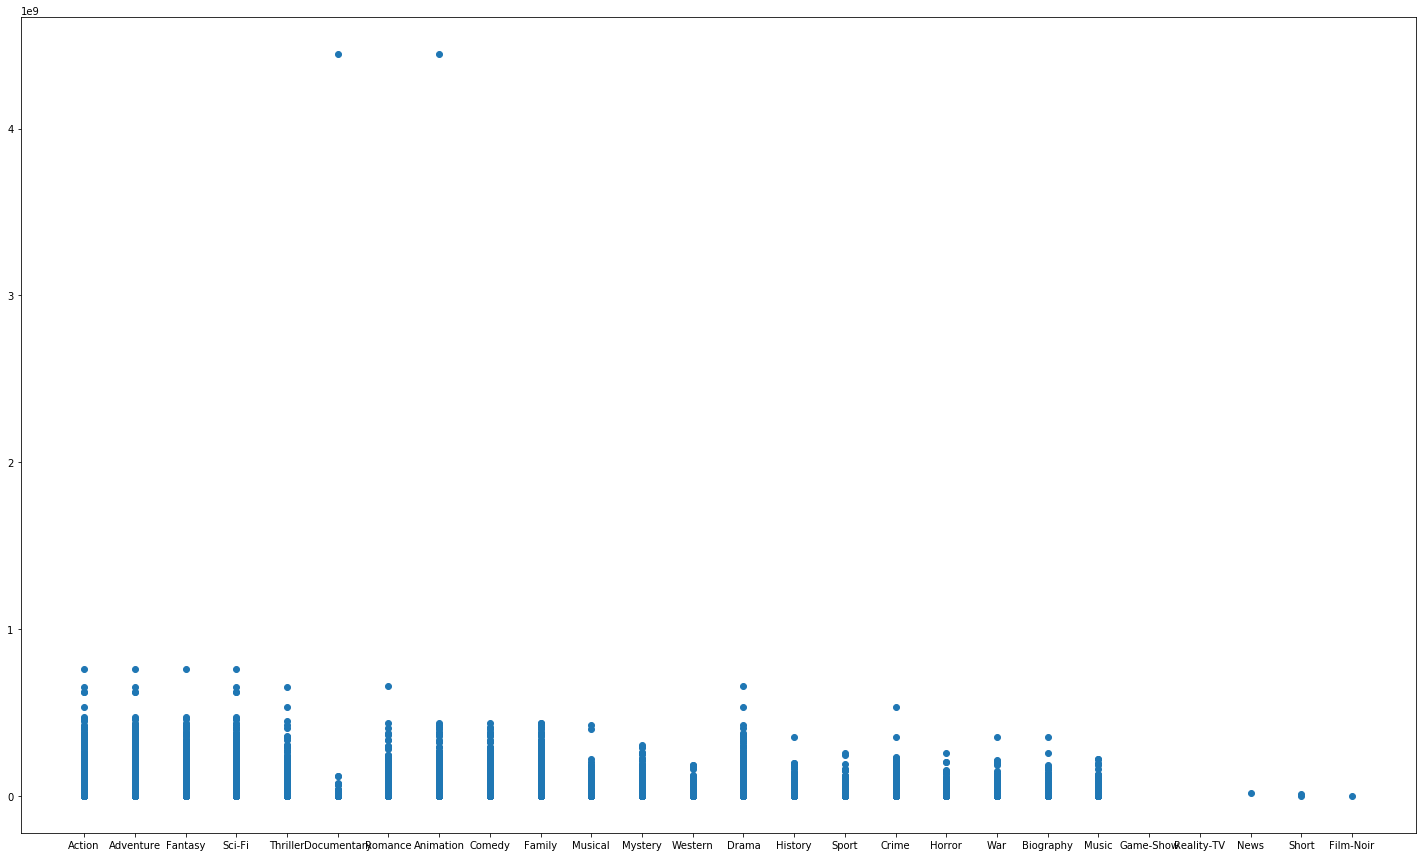

In [15]:
# 'genres' & 'gross'
plt.figure(figsize=(25, 15))
plt.scatter(a['genres'], a['gross'])

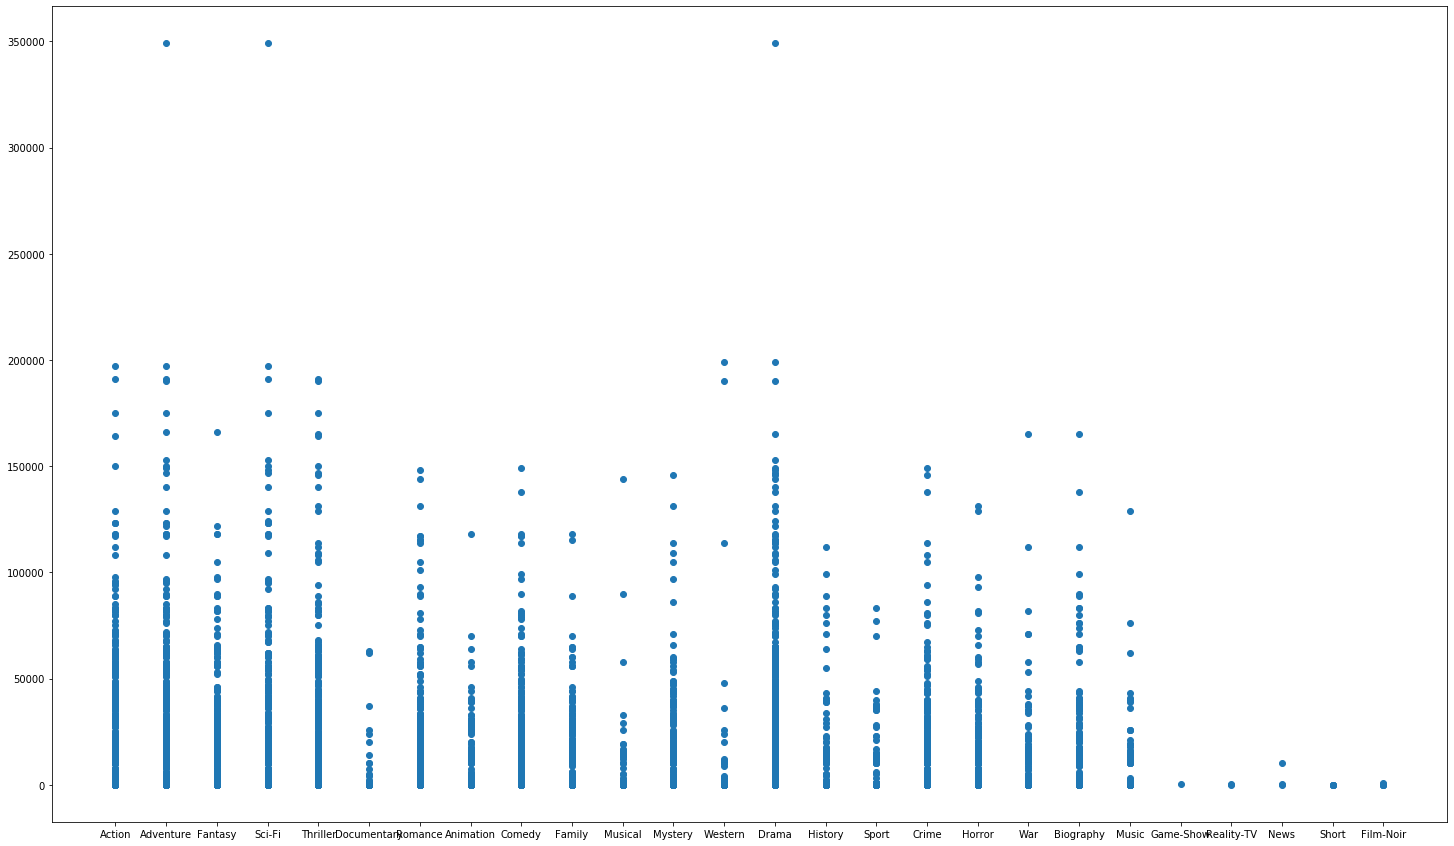

In [16]:
# 'genres' & 'movie_facebook_likes'
plt.figure(figsize=(25, 15))
plt.scatter(a['genres'],a['movie_facebook_likes'])

In [17]:
# 3rd task - find coutry with the best mean score
meanData = a.groupby(['country'])['imdb_score'].agg('mean')
meanData.sort_values(ascending=False)

country
English                 98.000000
Kyrgyzstan               9.100000
Libya                    8.400000
United Arab Emirates     8.200000
Egypt                    8.100000
Soviet Union             8.100000
Argentina                7.775000
Israel                   7.653846
Iran                     7.600000
Indonesia                7.600000
West Germany             7.520000
Cameroon                 7.500000
Colombia                 7.500000
Iceland                  7.457143
Kenya                    7.400000
Afghanistan              7.400000
New Zealand              7.331250
Sweden                   7.330000
Taiwan                   7.300000
Brazil                   7.229412
Panama                   7.200000
Finland                  7.200000
Czech Republic           7.010000
Pakistan                 7.000000
Japan                    6.988235
Norway                   6.978947
Netherlands              6.935714
Denmark                  6.911538
Italy                    6.901852
Chile 

In [18]:
# I think it can be 2nd task
n = a.groupby(['actor_1_name', 'director_name', 'movie_title'])['gross'].agg('mean')
n = n.sort_values(ascending=False)
n.head(20)

actor_1_name         director_name      movie_title                                
Unit 1               Aina Obama         A!O!U!I!E!                                     4.444444e+09
CCH Pounder          James Cameron      Avatar                                         7.605058e+08
Leonardo DiCaprio    James Cameron      Titanic                                        6.586723e+08
Bryce Dallas Howard  Colin Trevorrow    Jurassic World                                 6.521773e+08
Chris Hemsworth      Joss Whedon        The Avengers                                   6.232795e+08
Christian Bale       Christopher Nolan  The Dark Knight                                5.333161e+08
Natalie Portman      George Lucas       Star Wars: Episode I - The Phantom Menace      4.745447e+08
Harrison Ford        George Lucas       Star Wars: Episode IV - A New Hope             4.609357e+08
Chris Hemsworth      Joss Whedon        Avengers: Age of Ultron                        4.589916e+08
Tom Hardy       

In [19]:
clean_spoiled = data_raw.copy()

In [20]:
clean_spoiled['budget'][clean_spoiled.budget <=0 ]

Series([], Name: budget, dtype: float64)

In [21]:
clean_spoiled['duration'].max()

511.0

In [22]:
m = clean_spoiled['movie_title'].astype(str)
m= clean_spoiled['movie_title'].str.count(' ') + 1
new_df = clean_spoiled.assign(count_worlds = m) 
new_df = new_df.drop(new_df[new_df.count_worlds != 2].index)
print(new_df.shape[0])
new_df.head()

1617


,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title,count_worlds
5,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,NaN,3,0,2
6,6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,NaN,2,0,2
11,11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,Kevin Spacey,Superman Returns,240396,29991,Frank Langella,0,crystal|epic|lex luthor|lois lane|return to earth,http://www.imdb.com/title/tt0348150/?ref_=fn_t...,2367,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0,NaN,4,0,2
17,17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,NaN,2,0,2
22,22,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,105219735.0,Action|Adventure|Drama|History,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,1190s|archer|england|king of england|robin hood,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,200000000.0,2010.0,882.0,6.7,2.35,17000,NaN,1,0,2


In [23]:
new_df.country.value_counts()

USA               1251
UK                 124
France              46
Canada              37
Germany             32
Australia           15
Spain               10
Japan                8
Hong Kong            7
Russia               6
South Korea          6
Italy                6
New Zealand          6
China                6
India                6
Ireland              4
Brazil               4
Thailand             3
Israel               3
South Africa         3
Mexico               3
Netherlands          3
Norway               3
Belgium              2
Sweden               2
Denmark              2
Argentina            2
Iran                 2
Hungary              1
West Germany         1
Taiwan               1
Aruba                1
Egypt                1
Switzerland          1
Greece               1
Poland               1
Chile                1
Czech Republic       1
Finland              1
Peru                 1
Nigeria              1
Official site        1
Name: country, dtype: int64

In [24]:
clean_spoiled.language.value_counts()

English       4709
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Italian         11
Russian         11
Cantonese       11
Korean           8
Portuguese       8
Danish           5
Arabic           5
Swedish          5
Hebrew           5
Norwegian        4
Polish           4
Persian          4
Dutch            4
Chinese          3
Thai             3
Dari             2
Romanian         2
Aboriginal       2
None             2
Icelandic        2
Zulu             2
Indonesian       2
Kazakh           1
Kannada          1
Slovenian        1
8                1
Mongolian        1
Tamil            1
Panjabi          1
Maya             1
Bosnian          1
Greek            1
Aramaic          1
Telugu           1
Dzongkha         1
Filipino         1
Urdu             1
Czech            1
Vietnamese       1
Swahili          1
Hungarian        1
Morse            1
Name: language, dtype: int64

In [30]:
clean_spoiled = clean_spoiled.drop(clean_spoiled[clean_spoiled.color ==  "Green and Yellow" ].index)
clean_spoiled = clean_spoiled.drop(clean_spoiled[clean_spoiled.imdb_score > 10].index)
clean_spoiled = clean_spoiled.drop(clean_spoiled[clean_spoiled.actor_3_facebook_likes == 100500.0].index) # 100500 :D
#clean_spoiled = clean_spoiled.drop(clean_spoiled[clean_spoiled.country == "New Line"].index) # New Line is not a coutry
#clean_spoiled = clean_spoiled.drop(clean_spoiled[clean_spoiled.duration == 511].index) # Trapped is TV show
clean_spoiled = clean_spoiled.drop(clean_spoiled[clean_spoiled.country == "Official site"].index) 
clean_spoiled = clean_spoiled.drop(clean_spoiled[clean_spoiled.num_voted_users == '265'].index)
clean_spoiled = clean_spoiled.drop(clean_spoiled[clean_spoiled.language == 'Maya'].index)

In [31]:
spoiled = data_raw[~data_raw.index.isin(clean_spoiled.index)]
spoiled.head(10)

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title
1236,1236,Color,Mel Gibson,283.0,139.0,0.0,19.0,Dalia Hernández,708.0,5.085989e+07,Action|Adventure|Drama|Thriller,Rudy Youngblood,Apocalypto,236000,848,Jonathan Brewer,0,jaguar|mayan|solar eclipse|tribe|village,http://www.imdb.com/title/tt0472043/?ref_=fn_t...,1043,Maya,USA,R,40000000.0,2006.0,78.0,7.8,1.85,14000,NaN,2,0
1761,1761,Color,IC Wiener,666.0,69.0,17.0,100500.0,Nibbler,-32.0,1.111111e+06,Fantasy|Comedy|Sci-Fi,Philip J. Fry,No name yet,41,404,Turangalila,7,future|mission|space|delivery|bite my shiny me...,http://www.imdb.com/title/tt0119210/?ref_=fn_t...,25,English,USA,R,37000001.0,1999.0,102.0,6.9,1.85,123,0.003,1,0
2676,2676,Color,Shana Feste,135.0,117.0,19.0,461.0,Cinda McCain,3000.0,2.021892e+07,Drama|Music,Leighton Meester,Country Strong,14814,4204,Tim McGraw,4,country music|panties|pink panties|relapse|son...,http://www.imdb.com/title/tt1555064/?ref_=fn_t...,114,English,Official site,PG-13,15000000.0,2010.0,646.0,6.3,2.35,0,NaN,2,0
4638,4638,Color,Sanjay Rawal,9.0,83.0,0.0,17.0,Robert Kennedy Jr.,56.0,NaN,Documentary|News,Alma Martinez,Food Chains,265,104,Eve Ensler,0,two word title,http://www.imdb.com/title/tt2141739/?ref_=fn_t...,3,English,USA,NaN,913000.0,2014.0,28.0,7.1,NaN,489,NaN,1,0
4941,4941,Green and Yellow,Aina Obama,140.0,108.0,777.0,100.0,200,300.0,4.444444e+09,Animation|Documentary,Unit 1,A!O!U!I!E!,35701,1488,Unit 3,3,no fate| detroit| michigan| merefa| absolution...,http://www.imdb.com/title/tt2403815/?ref_=fn_t...,3,Morse,Kyrgyzstan,NaN,21345000.0,2019.0,3.0,9.9,1.00,7517,NaN,1,5
5038,5038,Color,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,NaN,Comedy|Horror|Thriller,Julianna Pitt,Sanctuary,Quite a Conundrum,133,1111,John Lucas,NaN,nudity|party|pirate|swimsuit|three word title,http://www.imdb.com/title/tt2049518/?ref_=fn_t...,8,English,USA,NaN,200000.0,2012.0,98.0,5.40,16,424.000,3,0


In [25]:
a = clean_spoiled.copy()
a = (a.set_index(a.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'}))
a.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title,level_31,genres
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0,0,Action
1,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0,1,Adventure
2,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0,2,Fantasy
3,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0,3,Sci-Fi
4,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,8,0,0,Action


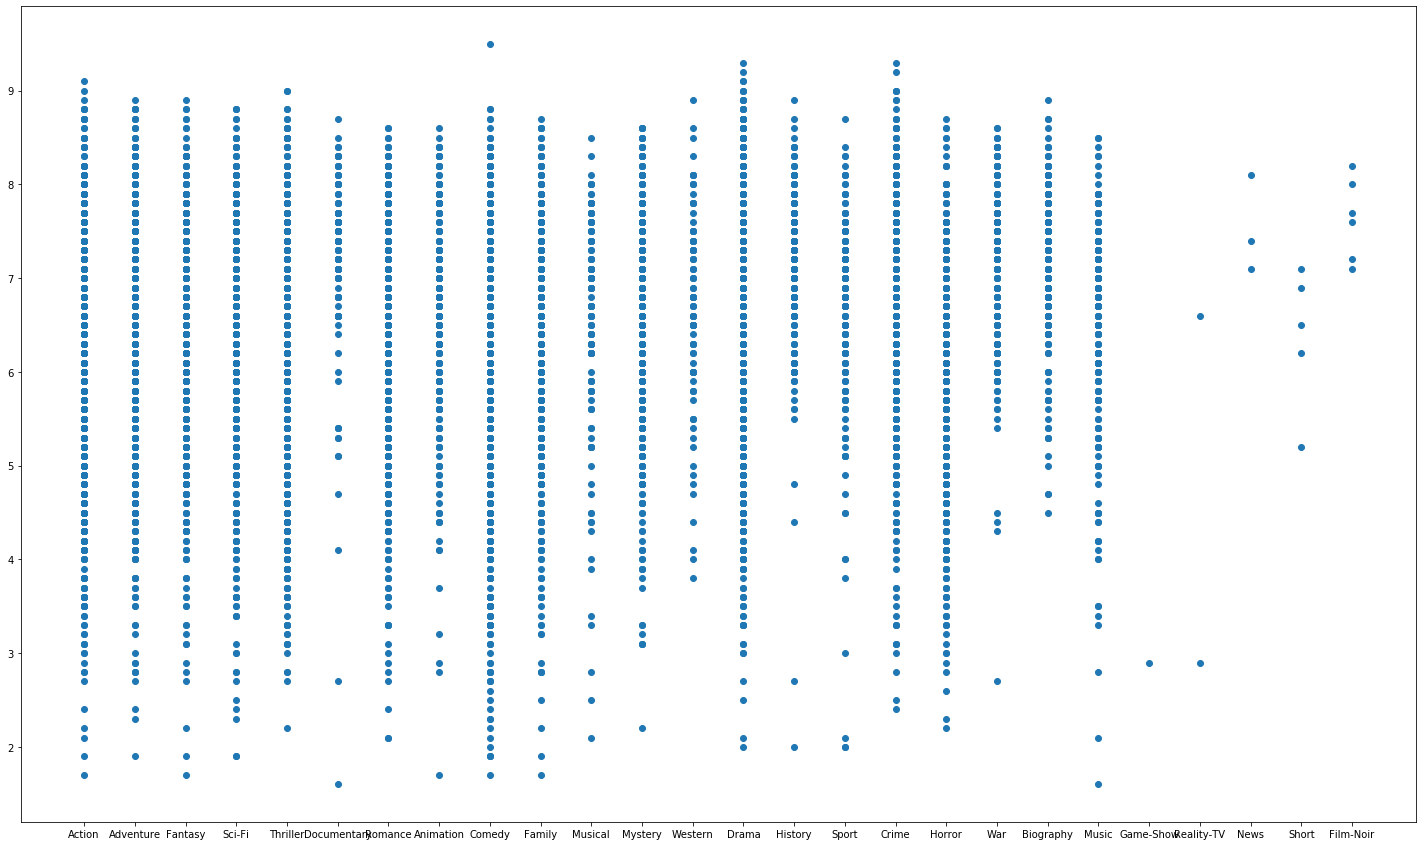

In [26]:
plt.figure(figsize=(25, 15))
plt.scatter(a['genres'],a['imdb_score'])

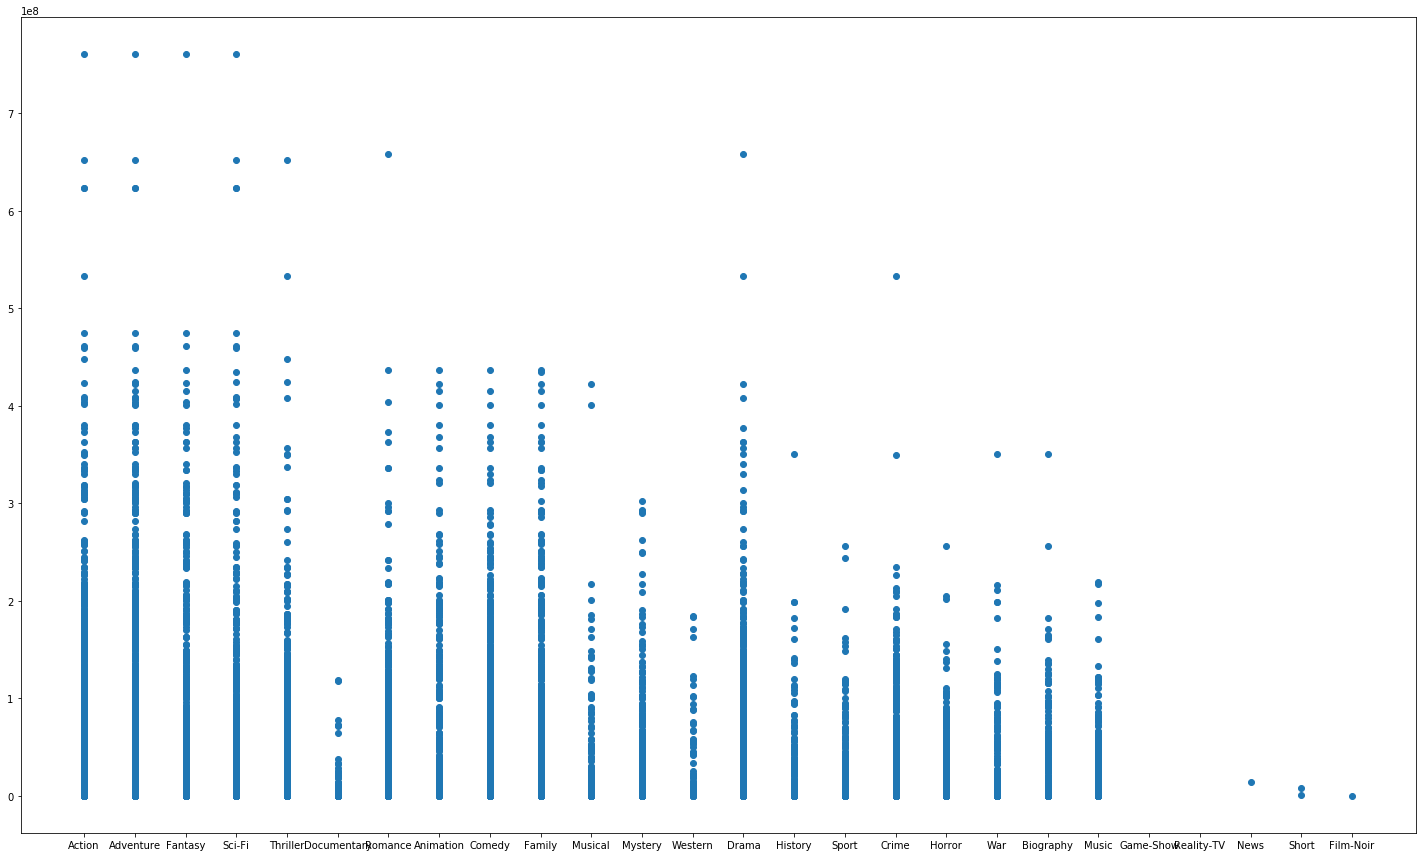

In [27]:
# 'genres' & 'gross'
plt.figure(figsize=(25, 15))
plt.scatter(a['genres'], a['gross'])

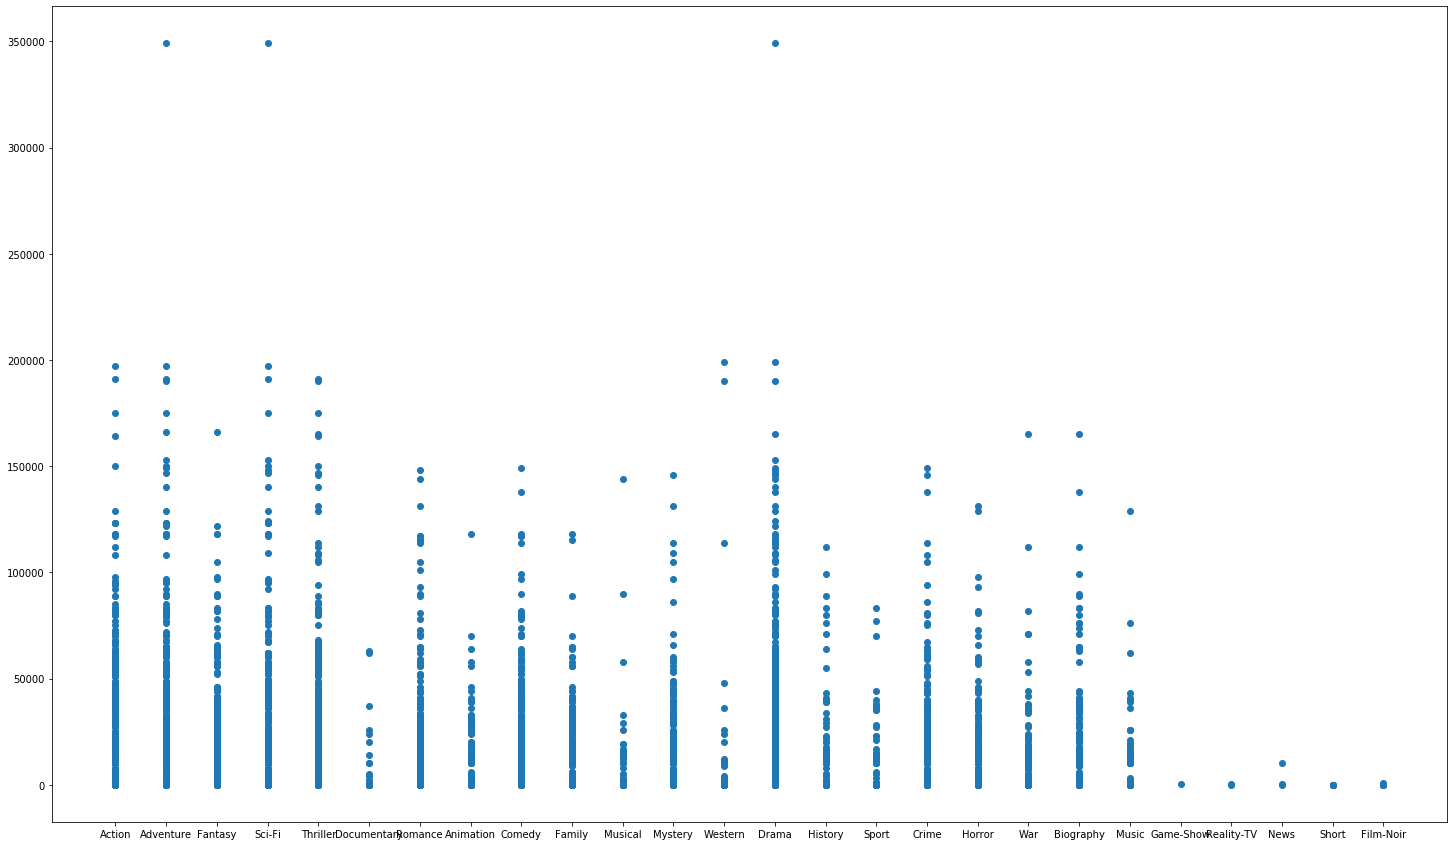

In [28]:
# 'genres' & 'movie_facebook_likes'
plt.figure(figsize=(25, 15))
plt.scatter(a['genres'],a['movie_facebook_likes'])